#Import All Libraries

In [ ]:
%tensorflow_version 1.x

import pandas as pd
import numpy as np
import io
import math
import tensorflow as tf
import keras
import cv2 as cv
import keras.utils
import tensorflow_hub as hub
import tensorflow.keras.utils
from keras import utils as np_utils
from sklearn import preprocessing
import os
import collections
import matplotlib.pyplot as plt
import random
from google.colab import drive
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten,\
                         Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras import regularizers
from keras import optimizers

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten,\
                         Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras import regularizers
from keras import optimizers


print("Tensorflow version %s" %tf.__version__)

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
print("--->  All Library are imported correctly!  <---")

Tensorflow version 1.15.2
Found GPU at: /device:GPU:0
--->  All Library are imported correctly!  <---


#Load Data

In [ ]:
def get_img_and_labels():
  """Split the data into train and test sets and get the label classes."""
  train_examples, test_examples = [], []
  shuffler = random.Random(RANDOM_VAL)
  is_root = True
  all_labels=[]
  labels = []
  for (dirname, subdirs, filenames) in tf.gfile.Walk(DATASET_DIR):
    # The root directory gives us the classes
    if is_root:
      subdirs = sorted(subdirs)
      #CLASSES = collections.OrderedDict(enumerate(subdirs))
      label_to_class = dict([(x, i) for i, x in enumerate(subdirs)])
      CLASSES = dict([(i, x) for i, x in enumerate(subdirs)])
      is_root = False
    # The sub directories give us the image files for training.
    else:
      filenames.sort()
      shuffler.shuffle(filenames)
      full_filenames = [os.path.join(dirname, f) for f in filenames]
      label = dirname.split('/')[-1]
      label_class = label_to_class[label]
      # An example is the image file and it's label class.
      examples = list(zip(full_filenames, [label_class] * len(filenames)))
      for _ in range(len(filenames)):
        all_labels.append([label,label_class])
      train_examples.extend(examples)
      labels.append(label)
  return train_examples, all_labels , CLASSES

def get_label(example):
  """Get the label (number) for given example."""
  return example[1]

def get_class(example):
  """Get the class (string) of given example."""
  return encode_classes[get_label(example)]
def get_class_from_id(example):
  return encode_classes[example]

def get_image(example):
  """Get image as np.array of pixels for given example."""
  return cv.imread(example, 3)

def get_labels(Y_from):
  labels =[]
  for label in Y_from:
    if label[0] not in labels:
      labels.append(label[0])
  return labels

def display_images(images_and_classes, cols=5):
  """Display given images and their labels in a grid."""
  rows = int(math.ceil(len(images_and_classes) / cols))
  fig = plt.figure()
  fig.set_size_inches(cols * 3, rows * 3)
  for i, (image, flower_class) in enumerate(images_and_classes):
    plt.subplot(rows, cols, i + 1)
    plt.axis('off')
    plt.imshow(image)
    plt.title(flower_class)


In [ ]:
drive.mount('/content/drive')

DATASET_DIR = '/content/drive/My Drive/ML_HW2/dataset/'

input_shape = ()

BATCH_SIZE = 64
img_width = 94
img_height = 94

TRAIN_FRACTION = 0.77777
RANDOM_VAL = 2020

X_all, Y_all, encode_classes = get_img_and_labels()
labels = get_labels(Y_all)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(len(X_all))

8526


In [ ]:
X_all_trans = []
i = 0

for sample in X_all[:len(X_all)]:
  X_all_trans.append(cv.resize(get_image(sample[0]),(img_width,img_height),interpolation = cv.INTER_AREA))
  if (i % 1000 == 0):
    print(str(i) + " / %d" % (len(X_all)))
  i +=1 
print("%d / %d" % (len(X_all),len(X_all)))

0 / 8526
1000 / 8526
2000 / 8526
3000 / 8526
4000 / 8526
5000 / 8526
6000 / 8526
7000 / 8526
8000 / 8526
8526 / 8526


In [ ]:
Y_all_trans = []
print(Y_all)
for sample in Y_all[:len(Y_all)]:
  Y_all_trans.append(get_class(sample))

print(len(Y_all_trans))
print(Y_all_trans)

[['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerwar

In [ ]:
print(len(X_all_trans))

8526


In [ ]:
labels

['dinnerware',
 'pasta_sides',
 'sushi_plate',
 'Oranges',
 'Tea_drink_bottle',
 'Dust_Cloths',
 'Pretzels',
 'basket_container']

In [ ]:


NUM_CLASSES = len(Y_all)
print('\nThe dataset has %d label classes: %s' % (NUM_CLASSES, Y_all))
print('There are %d of all images' % len(X_all))

X_train, X_test, y_train, y_test = train_test_split(X_all_trans, Y_all_trans, test_size=0.3333, random_state=RANDOM_VAL)

train_datagen = ImageDataGenerator(
    rescale = 1. / 255,\
    zoom_range=0.1,\
    rotation_range=10,\
    width_shift_range=0.1,\
    height_shift_range=0.1,\
    horizontal_flip=True,\
    vertical_flip=False
)

process_label = preprocessing.LabelEncoder()
process_label.fit(labels)
y_train = process_label.transform(y_train)
y_test = process_label.transform(y_test)

train_generator = train_datagen.flow(
    np.array(X_train),
    np_utils.to_categorical(y_train,num_classes=len(labels)),
    batch_size=BATCH_SIZE,
    shuffle=True#False
)

validation_datagen = ImageDataGenerator(
    rescale = 1. / 255
)

validation_generator = validation_datagen.flow(
    np.array(X_test),
    np_utils.to_categorical(y_test,num_classes=len(labels)),
    shuffle=False
)

num_samples = train_generator.n
num_classes = len(labels)
input_shape = X_train[0].shape

print('Loaded %d     TRAIN    samples from %d classes.' %(train_generator.n,num_classes))
print('Loaded %d  VALIDATION  samples from %d classes.' %(validation_generator.n,num_classes))
print('Total  %d' %(train_generator.n + validation_generator.n))



The dataset has 8526 label classes: [['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware', 5], ['dinnerware

Show Random Image from Train and Test set

4
basket_container


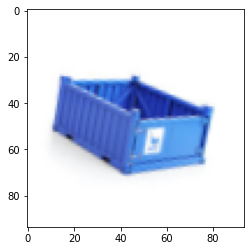

7
sushi_plate


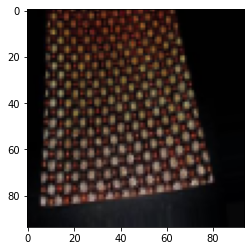

1
Oranges


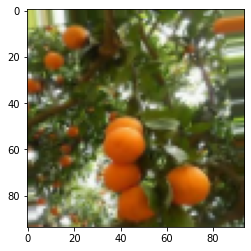

3
Tea_drink_bottle


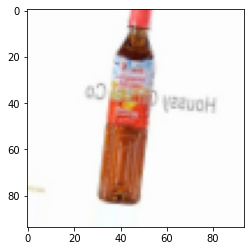

In [ ]:
import matplotlib.pyplot as plt

n = 4
x,y = train_generator.next()
# x,y size is train_generator.batch_size

for i in range(0,n):
    image = x[i]
    label = y[i].argmax()  # categorical from one-hot-encoding
    print(label)
    print(get_class_from_id(label))

    b,g,r = cv.split(image)           # get b, g, r
    rgb_img1 = cv.merge([r,g,b])     # switch it to r, g, b

    plt.imshow(rgb_img1)
    plt.show()

#Model

##EdoardoPapaNet

Custom Model is presented below

In [ ]:

def EdoardoPapaNet(input_shape, num_classes):

    model = Sequential(name="EdoardoPapaNet")

    #This is the first convolution
    model.add(Conv2D(32, (3,3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(2, 2))
    # The second convolution
    model.add(Conv2D(32, (3,3), activation='relu'))
    model.add(MaxPooling2D(2,2))
    # The third convolution
    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(MaxPooling2D(2,2))
    # The four convolution
    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(MaxPooling2D(2,2))
    # Flatten the results
    model.add(Flatten())
    model.add(Dense(512, activation='relu')) 
    model.add(Dropout(0.22))
    # Output Layer
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    # Compile

    optimizer = optimizers.rmsprop(lr=0.0001)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

##VGG16

In [ ]:
def VGG16Net(input_shape, num_classes,lr=0.00001):

  model3 = Sequential(name="VGG16Net")

  model3.add(Conv2D(input_shape=input_shape,filters=64,kernel_size=(3,3),padding="same", activation="relu"))
  model3.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
  model3.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
  model3.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
  model3.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
  model3.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
  model3.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
  model3.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
  model3.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
  model3.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
  model3.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model3.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model3.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model3.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
  model3.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model3.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model3.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model3.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
  model3.add(Flatten())
  model3.add(Dense(units=4096,activation="relu"))
  model3.add(Dense(units=4096,activation="relu"))
  model3.add(Dense(num_classes,activation='softmax'))

  model3.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(lr=0.00001), metrics=['accuracy'])

  return model3

In [ ]:
model = EdoardoPapaNet(input_shape,num_classes)
model.summary()

model3 = VGG16Net(input_shape,num_classes)
model3.summary()

Model: "EdoardoPapaNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_69 (Conv2D)           (None, 92, 92, 32)        896       
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 46, 46, 32)        0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 44, 44, 32)        9248      
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 20, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 8, 8, 64)       

##Plot EdoardoPapaNet

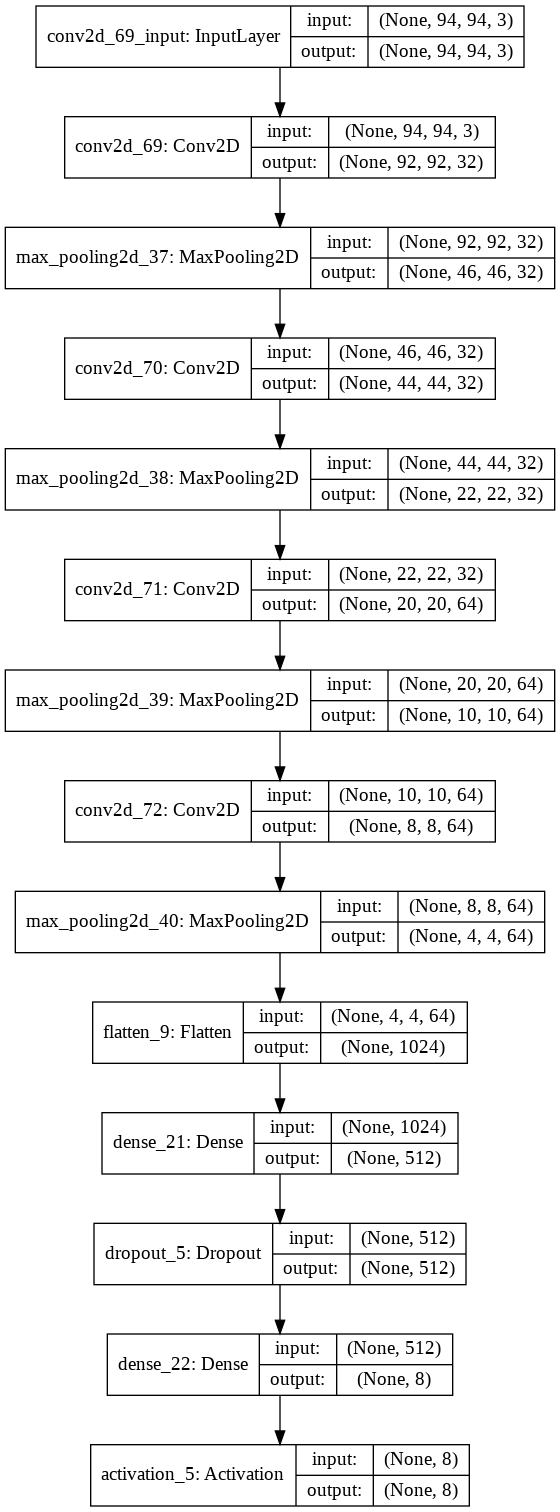

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

##Plot VGG16

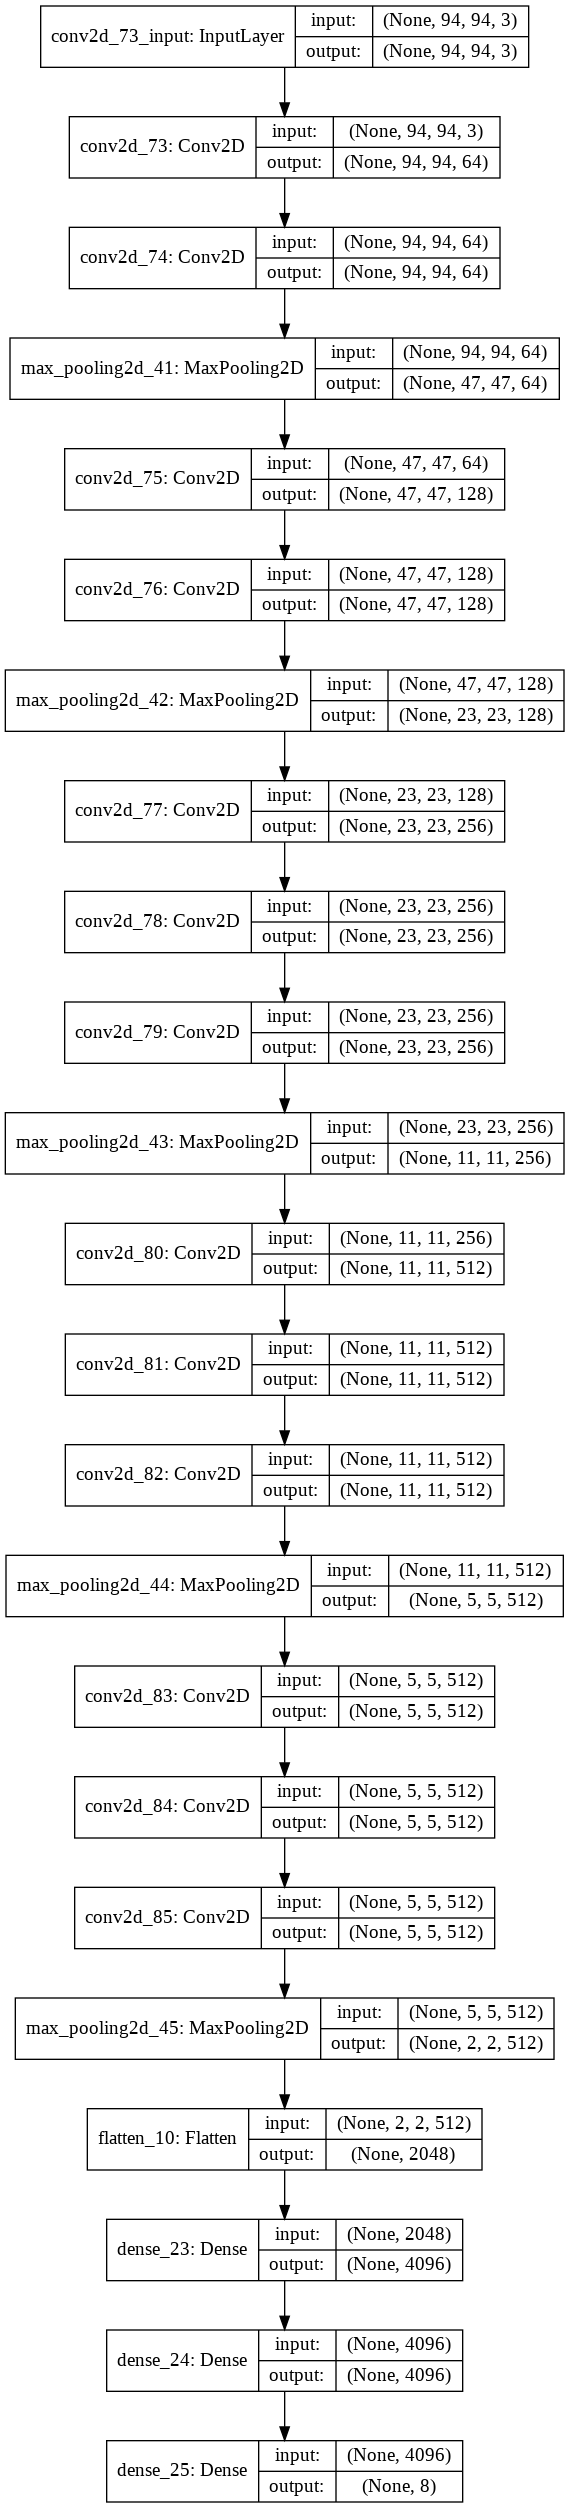

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model3, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

#Train

## Train EdoardoPapaNet Model

In [ ]:
from keras import callbacks

steps_per_epoch=train_generator.n//train_generator.batch_size
val_steps=validation_generator.n//validation_generator.batch_size+1

try:
    history_EdoardoPapaNet = model.fit_generator(train_generator, epochs=50, verbose=1,\
                    steps_per_epoch=steps_per_epoch,\
                    validation_data=validation_generator,\
                    validation_steps=val_steps)
except KeyboardInterrupt:
    pass

Epoch 1/50
88/88 [==============================] - 11s 129ms/step - loss: 1.9913 - accuracy: 0.2077 - val_loss: 1.8480 - val_accuracy: 0.3205
Epoch 2/50
88/88 [==============================] - 11s 127ms/step - loss: 1.8448 - accuracy: 0.2826 - val_loss: 1.8091 - val_accuracy: 0.3462
Epoch 3/50
88/88 [==============================] - 11s 127ms/step - loss: 1.7635 - accuracy: 0.3299 - val_loss: 1.7652 - val_accuracy: 0.3783
Epoch 4/50
88/88 [==============================] - 11s 126ms/step - loss: 1.7209 - accuracy: 0.3582 - val_loss: 1.8053 - val_accuracy: 0.3547
Epoch 5/50
88/88 [==============================] - 11s 127ms/step - loss: 1.6779 - accuracy: 0.3804 - val_loss: 1.6920 - val_accuracy: 0.4173
Epoch 6/50
88/88 [==============================] - 11s 126ms/step - loss: 1.6409 - accuracy: 0.4004 - val_loss: 1.6261 - val_accuracy: 0.4156
Epoch 7/50
88/88 [==============================] - 11s 126ms/step - loss: 1.5898 - accuracy: 0.4221 - val_loss: 1.6541 - val_accuracy: 0.4184

##Train VGG16

In [ ]:
from keras import callbacks

steps_per_epoch=train_generator.n//train_generator.batch_size
val_steps=validation_generator.n//validation_generator.batch_size+1

try:
    history_VGG16Net = model3.fit_generator(train_generator, epochs=50, verbose=1,\
                    steps_per_epoch=steps_per_epoch,\
                    validation_data=validation_generator,\
                    validation_steps=val_steps)
except KeyboardInterrupt:
    pass

Epoch 1/50
88/88 [==============================] - 20s 228ms/step - loss: 2.0329 - accuracy: 0.1708 - val_loss: 1.8919 - val_accuracy: 0.2266
Epoch 2/50
88/88 [==============================] - 20s 225ms/step - loss: 1.8708 - accuracy: 0.2448 - val_loss: 1.8261 - val_accuracy: 0.2861
Epoch 3/50
88/88 [==============================] - 20s 227ms/step - loss: 1.8192 - accuracy: 0.2765 - val_loss: 1.8455 - val_accuracy: 0.2730
Epoch 4/50
88/88 [==============================] - 20s 226ms/step - loss: 1.7888 - accuracy: 0.2858 - val_loss: 1.7743 - val_accuracy: 0.3132
Epoch 5/50
88/88 [==============================] - 20s 227ms/step - loss: 1.7784 - accuracy: 0.2945 - val_loss: 1.7585 - val_accuracy: 0.3023
Epoch 6/50
88/88 [==============================] - 20s 229ms/step - loss: 1.7394 - accuracy: 0.3190 - val_loss: 1.8005 - val_accuracy: 0.3001
Epoch 7/50
88/88 [==============================] - 20s 229ms/step - loss: 1.7229 - accuracy: 0.3326 - val_loss: 1.7091 - val_accuracy: 0.3582

#Save Model

In [ ]:
import os
models_dir ='/content/drive/My Drive/ML_HW2/model'

def savemodel(model,problem):
    filename = os.path.join(models_dir, '%s.h5' %problem)
    model.save(filename)
    print("\n--->  Model saved successfully on file %s  <---\n" %filename)

# Save the model
savemodel(model,'model_EdoardoPapaNet')
savemodel(model3,'model_VGG16Net')


--->  Model saved successfully on file /content/drive/My Drive/ML_HW2/model/model_EdoardoPapaNet.h5  <---


--->  Model saved successfully on file /content/drive/My Drive/ML_HW2/model/model_VGG16Net.h5  <---



#Evaluate the model

##Evaluation of EdoardoPapaNet

Accuracy

In [ ]:
val_steps=validation_generator.n//validation_generator.batch_size+1
loss, acc = model.evaluate_generator(validation_generator,steps=val_steps)
print('Test loss: %f' %loss)
print('Test accuracy: %f' %acc)

Test loss: 1.231078
Test accuracy: 0.558410


Precision, recall, F-score

In [ ]:
import sklearn.metrics 
from sklearn.metrics import classification_report, confusion_matrix
 
preds = model.predict_generator(validation_generator,steps=val_steps)

Ypred = np.argmax(preds, axis=1)
Ytest = y_test  # shuffle=False in test_generator

print(classification_report(Ytest, Ypred, labels=None, target_names=labels, digits=3))

                  precision    recall  f1-score   support

      dinnerware      0.543     0.415     0.470       429
     pasta_sides      0.897     0.707     0.790       368
     sushi_plate      0.521     0.674     0.588       353
         Oranges      0.610     0.531     0.567       309
Tea_drink_bottle      0.393     0.705     0.504       400
     Dust_Cloths      0.549     0.529     0.539       297
        Pretzels      0.620     0.652     0.636       316
basket_container      0.630     0.276     0.383       370

        accuracy                          0.558      2842
       macro avg      0.595     0.561     0.560      2842
    weighted avg      0.593     0.558     0.556      2842



Confusion matrix analysis

In [ ]:
import sklearn.metrics 
from sklearn.metrics import classification_report, confusion_matrix

preds = model.predict_generator(validation_generator,verbose=1,steps=val_steps)

Ypred = np.argmax(preds, axis=1)
Ytest = y_test # shuffle=False in test_generator

cm = confusion_matrix(Ytest, Ypred)

conf = [] # data structure for confusions: list of (i,j,cm[i][j])
for i in range(0,cm.shape[0]):
  for j in range(0,cm.shape[1]):
    if (i!=j and cm[i][j]>0):
      conf.append([i,j,cm[i][j]])

col=2
conf = np.array(conf)
conf = conf[np.argsort(-conf[:,col])]  # decreasing order by 3-rd column (i.e., cm[i][j])

print('%-16s     %-16s  \t%s \t%s ' %('True','Predicted','errors','err %'))
print('------------------------------------------------------------------')
for k in conf:
  print('%-16s ->  %-16s  \t%d \t%.2f %% ' %(labels[k[0]],labels[k[1]],k[2],k[2]*100.0/validation_generator.n))
  

89/89 [==============================] - 0s 5ms/step
True                 Predicted         	errors 	err % 
------------------------------------------------------------------
basket_container ->  Tea_drink_bottle  	106 	3.73 % 
dinnerware       ->  Tea_drink_bottle  	99 	3.48 % 
Dust_Cloths      ->  Tea_drink_bottle  	65 	2.29 % 
sushi_plate      ->  Tea_drink_bottle  	65 	2.29 % 
Pretzels         ->  sushi_plate       	47 	1.65 % 
basket_container ->  Dust_Cloths       	46 	1.62 % 
Oranges          ->  Tea_drink_bottle  	43 	1.51 % 
dinnerware       ->  Oranges           	41 	1.44 % 
basket_container ->  dinnerware        	40 	1.41 % 
Tea_drink_bottle ->  sushi_plate       	39 	1.37 % 
Tea_drink_bottle ->  dinnerware        	38 	1.34 % 
Pretzels         ->  Tea_drink_bottle  	35 	1.23 % 
basket_container ->  sushi_plate       	34 	1.20 % 
Oranges          ->  sushi_plate       	33 	1.16 % 
dinnerware       ->  Dust_Cloths       	32 	1.13 % 
dinnerware       ->  Pretzels          	29 	

###Plot results

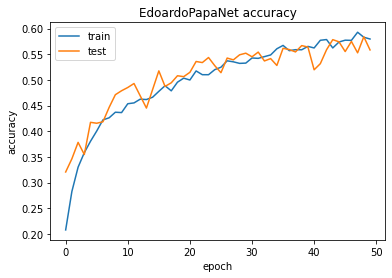

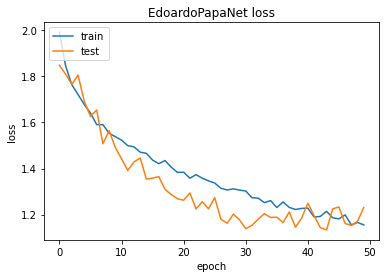

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history,name):

    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(name + ' accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(name + ' loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
        
name="EdoardoPapaNet"
plot_history(history_EdoardoPapaNet, name)

##Evaluation of VGG16

Accuracy

In [ ]:
val_steps=validation_generator.n//validation_generator.batch_size+1
loss, acc = model3.evaluate_generator(validation_generator,steps=val_steps)
print('Test loss: %f' %loss)
print('Test accuracy: %f' %acc)

Test loss: 1.291933
Test accuracy: 0.574947


Precision, recall, F-score

In [ ]:
import sklearn.metrics 
from sklearn.metrics import classification_report, confusion_matrix
 
preds = model3.predict_generator(validation_generator,steps=val_steps)

Ypred = np.argmax(preds, axis=1)
Ytest = y_test  # shuffle=False in test_generator

print(classification_report(Ytest, Ypred, labels=None, target_names=labels, digits=3))

                  precision    recall  f1-score   support

      dinnerware      0.595     0.373     0.458       429
     pasta_sides      0.869     0.772     0.817       368
     sushi_plate      0.642     0.629     0.635       353
         Oranges      0.612     0.531     0.568       309
Tea_drink_bottle      0.378     0.680     0.486       400
     Dust_Cloths      0.691     0.407     0.513       297
        Pretzels      0.605     0.731     0.662       316
basket_container      0.507     0.486     0.497       370

        accuracy                          0.575      2842
       macro avg      0.612     0.576     0.580      2842
    weighted avg      0.607     0.575     0.576      2842



Confusion matrix analysis


In [ ]:
import sklearn.metrics 
from sklearn.metrics import classification_report, confusion_matrix

preds = model3.predict_generator(validation_generator,verbose=1,steps=val_steps)

Ypred = np.argmax(preds, axis=1)
Ytest = y_test # shuffle=False in test_generator

cm = confusion_matrix(Ytest, Ypred)

conf = [] # data structure for confusions: list of (i,j,cm[i][j])
for i in range(0,cm.shape[0]):
  for j in range(0,cm.shape[1]):
    if (i!=j and cm[i][j]>0):
      conf.append([i,j,cm[i][j]])

col=2
conf = np.array(conf)
conf = conf[np.argsort(-conf[:,col])]  # decreasing order by 3-rd column (i.e., cm[i][j])

print('%-16s     %-16s  \t%s \t%s ' %('True','Predicted','errors','err %'))
print('------------------------------------------------------------------')
for k in conf:
  print('%-16s ->  %-16s  \t%d \t%.2f %% ' %(labels[k[0]],labels[k[1]],k[2],k[2]*100.0/validation_generator.n))

89/89 [==============================] - 3s 34ms/step
True                 Predicted         	errors 	err % 
------------------------------------------------------------------
dinnerware       ->  Tea_drink_bottle  	115 	4.05 % 
basket_container ->  Tea_drink_bottle  	84 	2.96 % 
Dust_Cloths      ->  Tea_drink_bottle  	75 	2.64 % 
sushi_plate      ->  Tea_drink_bottle  	59 	2.08 % 
Oranges          ->  Tea_drink_bottle  	58 	2.04 % 
Dust_Cloths      ->  basket_container  	52 	1.83 % 
dinnerware       ->  Oranges           	46 	1.62 % 
dinnerware       ->  basket_container  	44 	1.55 % 
sushi_plate      ->  Pretzels          	35 	1.23 % 
Pretzels         ->  Tea_drink_bottle  	33 	1.16 % 
Tea_drink_bottle ->  basket_container  	33 	1.16 % 
pasta_sides      ->  Pretzels          	31 	1.09 % 
Tea_drink_bottle ->  dinnerware        	30 	1.06 % 
basket_container ->  Pretzels          	29 	1.02 % 
Tea_drink_bottle ->  sushi_plate       	27 	0.95 % 
basket_container ->  dinnerware        	25 

###Plot results

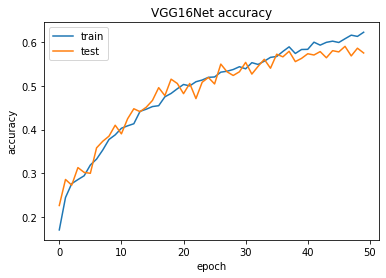

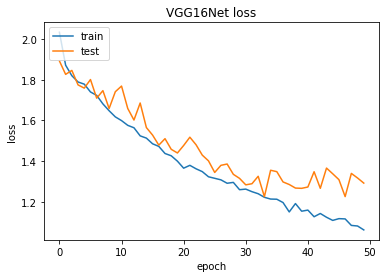

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history,name):

    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(name + ' accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(name + ' loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
        
name="VGG16Net"
plot_history(history_VGG16Net, name)